In [2]:
# Import necessary libraries.

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [3]:
# Import dataset and use head() to preview dataframe.

wine_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_576_F24/winequality-white-data.csv", delimiter=";", header=None)
print(wine_data.head())

    0     1     2     3      4     5      6       7     8     9     10  11
0  7.0  0.27  0.36  20.7  0.045  45.0  170.0  1.0010  3.00  0.45   8.8   6
1  6.3  0.30  0.34   1.6  0.049  14.0  132.0  0.9940  3.30  0.49   9.5   6
2  8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44  10.1   6
3  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9   6
4  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9   6


In [4]:
# Find shape of dataframe and validate that we have appropriate dimensions.

wine_data.shape

(4898, 12)

In [5]:
# rename columns using a dictionary and columns parameter in the rename() function.

df = wine_data.rename(columns={
    wine_data.columns[0]: 'fixed acidity', 
    wine_data.columns[1]: 'volatile acidity',
    wine_data.columns[2]: 'citric acid',
    wine_data.columns[3]: 'residual sugar', 
    wine_data.columns[4]: 'chlorides',
    wine_data.columns[5]: 'free sulfur dioxide',
    wine_data.columns[6]: 'total sulfur dioxide', 
    wine_data.columns[7]: 'density',
    wine_data.columns[8]: 'pH',
    wine_data.columns[9]: 'sulphates', 
    wine_data.columns[10]: 'alcohol',
    wine_data.columns[11]: 'quality',
})
df

y = df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], axis=1)
X_mat = df.drop('quality', axis=1)
X_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [6]:
# Problem 1: Feature Selection by Variance Threshold (threshold = 0.1)

thresholder_wine = VarianceThreshold(threshold=0.1)
X_high_variance = thresholder_wine.fit_transform(X_mat)

features = thresholder_wine.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns = [X_mat.columns[i] for i in features])

print("Shape of Data after Variance Threshold:", X_high_variance_df.shape)
print(X_high_variance_df.head())

Shape of Data after Variance Threshold: (4898, 5)
   fixed acidity  residual sugar  free sulfur dioxide  total sulfur dioxide  \
0            7.0            20.7                 45.0                 170.0   
1            6.3             1.6                 14.0                 132.0   
2            8.1             6.9                 30.0                  97.0   
3            7.2             8.5                 47.0                 186.0   
4            7.2             8.5                 47.0                 186.0   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.04939

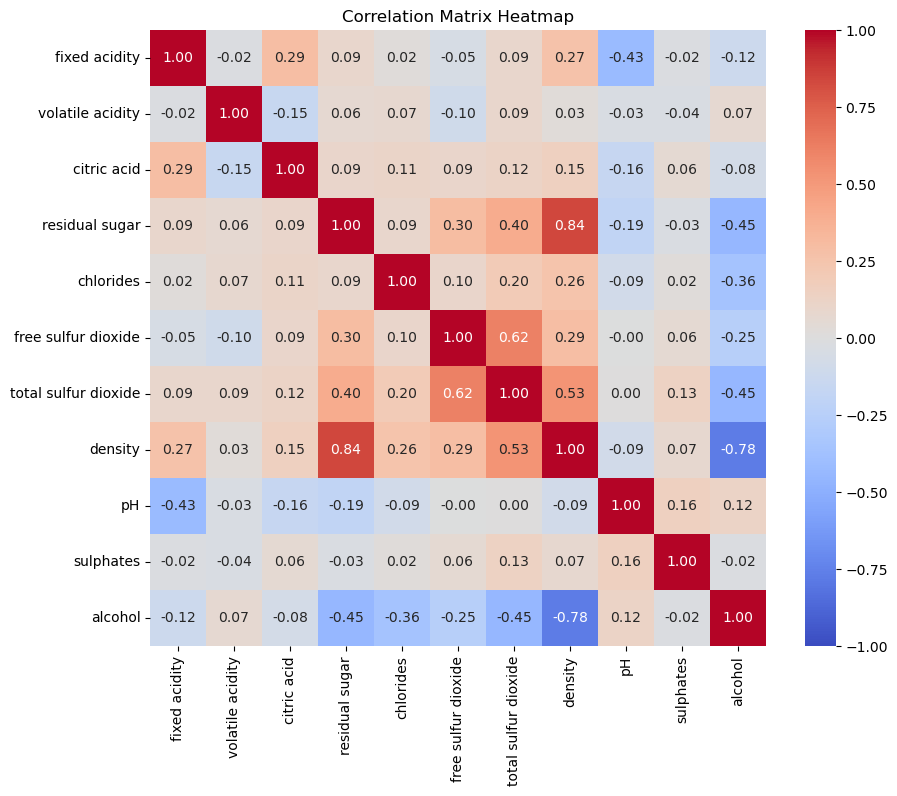

In [7]:
# Problem 2: Feature Selection by Correlation between Input Values

corr_mat_wine = X_mat.corr()
print("Correlation Matrix:")
print(corr_mat_wine)


corr_threshold_wine = 0.85

high_corr_pairs_wine = {}
for i in range(len(corr_mat_wine.columns)):
    for j in range(i+1,len(corr_mat_wine.columns)):
        if abs(corr_mat_wine.iloc[i,j]) > corr_threshold_wine:
            high_corr_pairs_wine[(corr_mat_wine.columns[i], corr_mat_wine.columns[j])] = corr_mat_wine.iloc[i,j]

print("Pairs with high correlation (|correlation| > {:.2f})".format(corr_threshold_wine))
for pair, corr_value in high_corr_pairs_wine.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_wine, annot= True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Problem 3: Feature Selection by Random Forest

#First, standardize the dataframe, then fit a RandomForestClassifier.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mat)

rand_forest_mod_wine = RandomForestClassifier(random_state=42)
rand_forest_mod_wine.fit(X_scaled, y)
importances_rf_wine = rand_forest_mod_wine.feature_importances_

top5_rf_wine = np.argsort(importances_rf_wine)[-5:]
selected_features_rf = df.columns[top5_rf_wine]
print(f"Top 5 features by random forest: {selected_features_rf.tolist()}\n")

C:\Users\coryg\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 5 features by random forest: ['total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'density', 'alcohol']



In [9]:
# Problem 4: Feature Selection by Linear Regression via P-value

#Split data into training and validation set using an 80/20 split and fit a linear regression model with alpha = 0.05 significance.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, shuffle=True, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lin_mod_wine = sm.OLS(y_train, X_train).fit()
print(lin_mod_wine.summary(alpha=0.05))

p_vals_wine = lin_mod_wine.pvalues
significance = 0.05
significant_features = p_vals_wine[p_vals_wine < significance].index.tolist()

print("Selected significant features (p-value < 0.05):", significant_features)


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.15e-274
Time:                        22:30:44   Log-Likelihood:                -4433.4
No. Observations:                3918   AIC:                             8891.
Df Residuals:                    3906   BIC:                             8966.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8757      0.012    489.189      0.0

In [10]:
# Problem 5: Feature Selection by Linear Regression with L1 Regularization

X_scaled_df = pd.DataFrame(X_scaled, columns=X_mat.columns)
lasso_mod_wine = Lasso(alpha=0.1, random_state=42)
lasso_mod_wine.fit(X_scaled_df, y)
coef_lasso_wine = np.abs(lasso_mod_wine.coef_)
selected_features_lasso = X_scaled_df.columns[coef_lasso_wine != 0]
print(f"Feature selection by Lasso Regression: {selected_features_lasso.tolist()}\n")

Feature selection by Lasso Regression: ['volatile acidity', 'alcohol']



In [11]:
# Extra Credit Questions

# Extra Credit Survey Questions (Post-HW1 Completion)

#1. How long did it take for you to finish this homework?

#This homework took about a week to complete as I initially had trouble
#importing the CSV dataset due to some parsing errors. However, incorporating
#each of the feature selection methods and understanding them conceptually
#was adequately challenging, but not exceedingly difficult.

#2. What problem was the easiest to implement?

#The easiest problem to implement was the variance threshold problem as we just needed
#to specify the threshold and fit the transform function over our scaled dataset.

#3. What problem was the most difficult to implement and why?

#The hardest problem to implement was the Correlation Between Inputs method
#because it involved heavier emphasis on coding the for loops properly with the
#correct indices so that the correlation matrix would be analyzed and outputted
#correctly.

#4. Do you have the confidence to implement all these algorithms to your
#real problems in the future?

#I am confident in understanding and implementing these algorithms to future
#problems, however I think the main hurdle is to get familiar on ways to 
#handle importing data that is not perfectly preprocessed, as I noticed
#that the data had some issues.